In [3]:
import cv2
import os
import PIL
import glob
from PIL import Image
import numpy as np

In [ ]:
def loadImages(path):
    a = np.arange(30*7500).reshape(30,7500)
    labels = []
    i = 0
    for filename in os.listdir(path):
        img = Image.open(path+filename)
        resized_image = img.resize((50,50))                 # resize to 50x50 cause of RAM problems
        test = np.array(resized_image)
        test = test.reshape(-1)
        if 'W' in filename:
            labels.append(0)
        elif 'F' in filename:
            labels.append(1)
        else:
            labels.append(2)
        a[i] = test
        i = i + 1
    print(a.shape)
    images = a.T
    print(images.shape)
    return images,labels
  

In [ ]:
path = "/content/drive/MyDrive/images/"
images,lbls = loadImages(path)


(30, 7500)
(7500, 30)


In [ ]:
import scipy.sparse as sp 
import scipy.sparse.linalg

def PCA_ImageSpaceVisualization(X):

  X_mean = X - np.mean(X, axis = 1, keepdims = True)
  cov_mat = np.cov(X_mean, rowvar = True)
  eigen_values , eigen_vectors = sp.linalg.eigsh(cov_mat)

  sorted_index = np.argsort(eigen_values)[::-1]

  sorted_eigenvalue = eigen_values[sorted_index]

  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  n_components = 2
  eigenvector_subset = sorted_eigenvectors[:,0:n_components]
  X_reduced = np.dot( eigenvector_subset.transpose() , X_mean ).T
  return X_reduced 

Για την υλοποίηση του PCA στην αρχή χρησιμοποίησα τον τρόπο του lab αλλά είχα αρκετά ram Problems και έπειτα χρησιμοποίησα κώδικα από : https://www.askpython.com/python/examples/principal-component-analysis
με λίγες μετατροπές γιατί και πάλι υπήρξαν κάποια ram problems.

In [ ]:
Images_reduced = PCA_ImageSpaceVisualization(images)

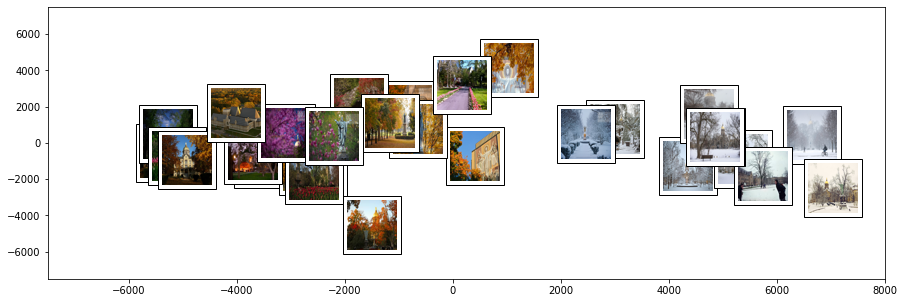

In [ ]:
z, y = zip(*Images_reduced)
fig, ax = plt.subplots(figsize= (15,5))

x0 = Images_reduced[:,0]
x1 = Images_reduced[:,1]

ax.scatter(z,y) 
for xbox, ybox, obj in zip(z, y,images.transpose()):
    ab = AnnotationBbox(OffsetImage(obj.reshape(50,50,3)), (xbox, ybox))
    ax.add_artist(ab)
ax.set_xlim(-7500, 8000)
ax.set_ylim(-7500, 7500)
plt.show()

**1.3)** **Τι σημαίνει όταν εικόνες βρίσκονται κοντά σε αυτό το χώρο δύο διαστάσεων που 
απεικονίζεται στο παραπάνω plot; Τι σημαίνει όταν εικόνες απέχουν πολύ; Μπορούμε 
να γενικεύσουμε αυτά τα συμπεράσματα για τον αρχικό χώρο των εικόνων ο οποίος είναι 
πολύ μεγάλης διάστασης;**


Από το παραπάνω plot βλέπουμε ότι οι εικόνες του χειμώνα είναι απομονωμένες σε σχέση με τις εικόνες της άνοιξης και του φθινοπώρου.Αυτό συμβαίνει επειδή οι χειμωνιάτικες εικόνες έχουν διαφορετικά χρώματα ( περισσότερο άσπρο από το χιόνι ) απότι των άλλων 2 εποχών. Γενικά έχουν μειωθεί κάτα πάρα πολύ οι διαστάσεις με τη μέθοδο PCA (principal component analysis) αλλά και πάλι βλέπουμε αρκετά αξιόπιστα αποτελέσματα για μία τέτοια μείωση επομένως και για τον αρχικό χώρο περιμένουμε τα ίδια και ακόμη καλύτερα αποτελέσματα.


**1.4)** **Οι εικόνες που αντιστοιχούν σε μία από τις εποχές τείνουν να ομαδοποιούνται πιο κοντά 
από ότι οι υπόλοιπες; Γιατί συμβαίνει αυτό;**

Όπως αναφέρθηκε και προηγουμένως οι εικόνες του χειμώνα ομαδοποιούνται μόνες τους σε σχέση με τις άλλες και αυτό γιατί τα χρώματα σε αυτές τις εικόνες είναι διαφορετικά απότι στις εικόνες από άνοιξη και φθινόπωρο που έχουν αρκετά κοινά χρώματα.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score


print("Accuracy of 1-NN with original Dimensions : ")

NN_1 = KNeighborsClassifier(n_neighbors = 1)
NN_1.fit(images.transpose(),lbls)
NN_1_score = cross_val_score(NN_1,images.transpose(),lbls, cv = 5)      #5 fold cross-validation
print(NN_1_score.mean(),"\n")

print("Accuracy of 3-NN with original Dimensions : ")

NN_3 = KNeighborsClassifier(n_neighbors = 3)
NN_3.fit(images.transpose(),lbls)
NN_3_score = cross_val_score(NN_3,images.transpose(),lbls, cv = 5)      #5 fold cross-validation
print(NN_3_score.mean(),"\n")

print("Accuracy of 1-NN with reduced Dimensions : ")

NN_1 = KNeighborsClassifier(n_neighbors = 1)
NN_1.fit(Images_reduced,lbls)
NN_1_score = cross_val_score(NN_1,Images_reduced,lbls, cv = 5)      #5 fold cross-validation
print(NN_1_score.mean(),"\n")

print("Accuracy of 3-NN with reduced Dimensions : ")

NN_3 = KNeighborsClassifier(n_neighbors = 3)
NN_3.fit(Images_reduced,lbls)
NN_3_score = cross_val_score(NN_3,Images_reduced,lbls, cv = 5)      #5 fold cross-validation
print(NN_3_score.mean())


Accuracy of 1-NN with original Dimensions : 
0.7666666666666667 

Accuracy of 3-NN with original Dimensions : 
0.6666666666666666 

Accuracy of 1-NN with reduced Dimensions : 
0.7 

Accuracy of 3-NN with reduced Dimensions : 
0.6333333333333333


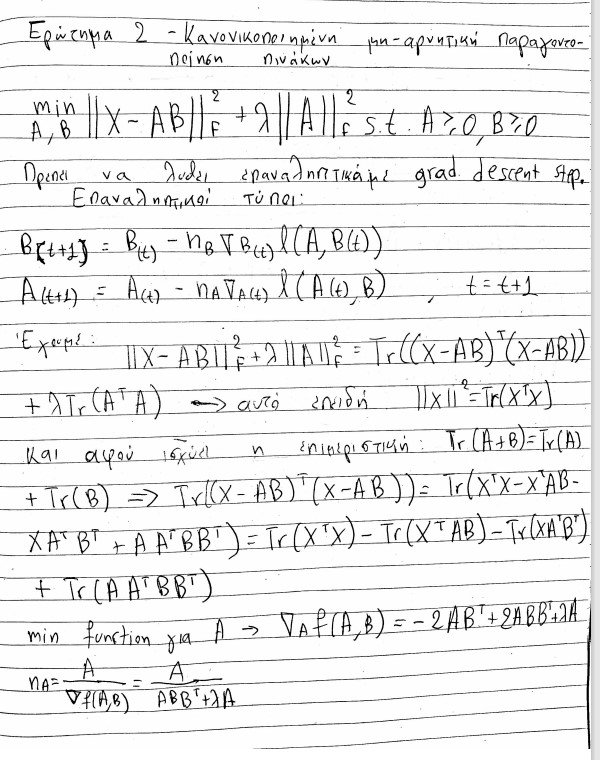

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/S1.jpg')

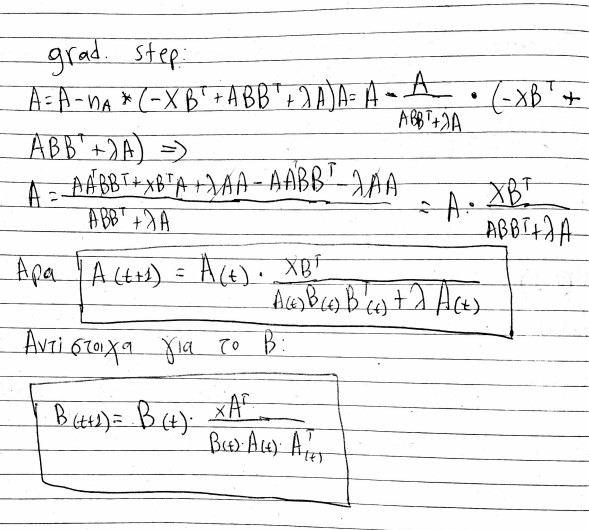

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/S2.jpg')

In [98]:

def RegNMF(X,k,l,epsilon):
  d = X.shape[0]
  N = X.shape[1]
  A_1 = np.random.random((d,k))
  B_1 = np.random.random((k,N))
  first_error = (np.linalg.norm(X - np.dot(A_1,B_1))/ np.linalg.norm(X))

  B = B_1 * np.dot(A_1.T,X)
  B = B / np.dot(A_1.T.dot(A_1),B_1)
  
  A = A_1 * X.dot(B.T)
  A = A / (A_1.dot(B.dot(B.T)) + l*A_1)
  

  second_error = np.linalg.norm(X - np.dot(A,B))/np.linalg.norm(X)
  diafora = second_error - first_error
  iterations = 1
  while abs(second_error - first_error) >= epsilon:
    A_2 = A
    B_2 = B
    first_error = second_error

    B = B_2 * np.dot(A_2.T,X)
    B = B / np.dot(A_2.T.dot(A_2),B_2)
    A = A_2 * X.dot(B.T)
    A = A / (A_2.dot(B.dot(B.T))+l*A_2)

    second_error = np.linalg.norm(X - np.dot(A,B))/np.linalg.norm(X)
    iterations = iterations + 1
  print("Iterations = ", iterations, "\tλ = ",l," \tk = ",k," \tepsilon=",epsilon)
  return A,B
    


In [99]:
W = np.random.rand(500,10)
H = np.random.rand(10,500)

X = np.matmul(W,H)            #creating the 500x500 X array

l = 0.5

kappa = [5,10,50]
epsilon = [0.1,0.01,0.001]

for k in kappa:
  for e in epsilon:
    A, B = RegNMF(X,k,l,e)



Iterations =  2 	λ =  0.5  	k =  5  	epsilon= 0.1
Iterations =  3 	λ =  0.5  	k =  5  	epsilon= 0.01
Iterations =  19 	λ =  0.5  	k =  5  	epsilon= 0.001
Iterations =  2 	λ =  0.5  	k =  10  	epsilon= 0.1
Iterations =  2 	λ =  0.5  	k =  10  	epsilon= 0.01
Iterations =  16 	λ =  0.5  	k =  10  	epsilon= 0.001
Iterations =  2 	λ =  0.5  	k =  50  	epsilon= 0.1
Iterations =  2 	λ =  0.5  	k =  50  	epsilon= 0.01
Iterations =  2 	λ =  0.5  	k =  50  	epsilon= 0.001


Βλέπουμε ότι για λ = 0.5 ο αλγόριθμος χρειάζεται περισσότερες επαναλήψεις για να συγκλίνει όταν το ε μικραίνει αρκετά (πχ epsilon = 0.001 και k=5 χρειάζεται 19 επαναλήψεις , και epsilon = 0.001 και k=10 χρειάζεται 16 επαναλήψεις) για k=50 όμως και για το ίδιο epsilon ο αλγόριθμος συγκλίνει αρκετά γρήγορα.